Accuracy: 0.28034682080924855
Confusion Matrix:
[[34 33 56]
 [28 44 36]
 [45 51 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.28      0.30       123
           1       0.34      0.41      0.37       108
           2       0.17      0.17      0.17       115

    accuracy                           0.28       346
   macro avg       0.28      0.28      0.28       346
weighted avg       0.28      0.28      0.28       346



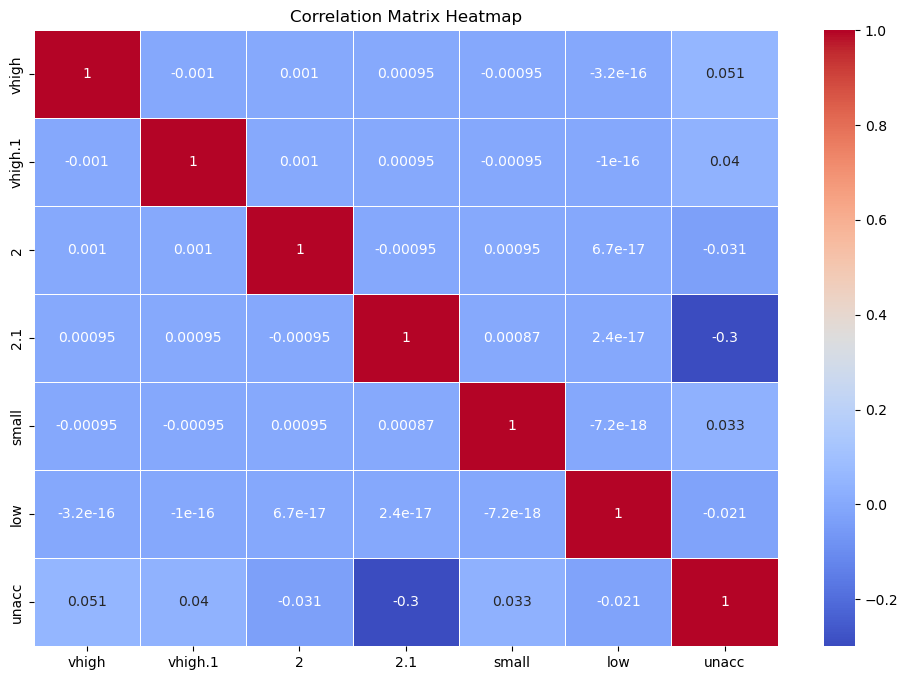

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('car_evaluation.csv')
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Iterate through the columns and encode categorical variables
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])
# Split the data into features (X) and the target variable (y)
X = data.drop('low', axis=1)
y = data['low']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
rf_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Generate classification report
class_report = classification_report(y_test, y_pred)
# Print the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
# Calculate the correlation matrix
correlation_matrix = data.corr()
# Create a heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
